<a href="https://colab.research.google.com/github/liwangivone/Rekomendasi-Jenis-Pupuk-XGBoost/blob/main/Pupuuk_Ivone_Orel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sistem Rekomendasi Pupuk Berbasis AI Menggunakan Algoritma XGBoost**

**1. Import Library dan Load Dataset**

In [1]:
# Import library

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset

df = pd.read_csv("pupukdataset.csv")
df.head()
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   jenis_tanaman       500 non-null    object 
 1   usia_tanaman_bulan  500 non-null    float64
 2   jenis_tanah         500 non-null    object 
 3   ph_tanah            500 non-null    float64
 4   curah_hujan_mm      500 non-null    int64  
 5   n_tanah             500 non-null    float64
 6   p_tanah             500 non-null    float64
 7   k_tanah             500 non-null    float64
 8   jenis_pupuk         500 non-null    object 
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


**2. Pengecekan Data**

In [3]:
# Distribusi fitur kategorikal dan label

print("Distribusi Jenis Tanaman:")
print(df["jenis_tanaman"].value_counts())

print("\nDistribusi Jenis Tanah:")
print(df["jenis_tanah"].value_counts())

print("\nDistribusi Jenis Pupuk (Label):")
print(df["jenis_pupuk"].value_counts())

Distribusi Jenis Tanaman:
jenis_tanaman
padi      293
jagung    207
Name: count, dtype: int64

Distribusi Jenis Tanah:
jenis_tanah
liat        169
lempung     167
berpasir    164
Name: count, dtype: int64

Distribusi Jenis Pupuk (Label):
jenis_pupuk
Dolomit         165
Urea            116
SP-36            67
NPK 15-15-15     67
NPK 16-16-16     56
KCl              29
Name: count, dtype: int64


In [4]:
# Distribusi fitur numerik

print("Distribusi Usia Tanaman (bulan):")
print(df["usia_tanaman_bulan"].describe())

print("\nDistribusi pH Tanah:")
print(df["ph_tanah"].describe())

print("\nDistribusi Curah Hujan (mm):")
print(df["curah_hujan_mm"].describe())

print("\nDistribusi Nitrogen Tanah (N):")
print(df["n_tanah"].describe())

print("\nDistribusi Fosfor Tanah (P):")
print(df["p_tanah"].describe())

print("\nDistribusi Potassium Tanah (K):")
print(df["k_tanah"].describe())

Distribusi Usia Tanaman (bulan):
count    500.000000
mean       6.042000
std        3.281489
min        0.600000
25%        3.100000
50%        5.900000
75%        8.825000
max       12.000000
Name: usia_tanaman_bulan, dtype: float64

Distribusi pH Tanah:
count    500.000000
mean       5.997480
std        0.872828
min        4.510000
25%        5.210000
50%        6.015000
75%        6.710000
max        7.500000
Name: ph_tanah, dtype: float64

Distribusi Curah Hujan (mm):
count     500.000000
mean     1951.756000
std       612.226601
min       807.000000
25%      1431.750000
50%      1933.000000
75%      2489.250000
max      2996.000000
Name: curah_hujan_mm, dtype: float64

Distribusi Nitrogen Tanah (N):
count    500.000000
mean       0.196408
std        0.087388
min        0.050000
25%        0.129500
50%        0.193000
75%        0.272000
max        0.349000
Name: n_tanah, dtype: float64

Distribusi Fosfor Tanah (P):
count    500.000000
mean      22.406400
std       10.038513
min   

**3. Data Cleaning**

In [5]:
# Data jenis pupuk dijadikan dalam huruf kecil

df["jenis_pupuk"] = df["jenis_pupuk"].str.lower()

In [6]:
# Hasil setelah cleaning
df.head ()

,jenis_tanaman,usia_tanaman_bulan,jenis_tanah,ph_tanah,curah_hujan_mm,n_tanah,p_tanah,k_tanah,jenis_pupuk
0,padi,8.5,berpasir,6.66,1580,0.134,39.3,224.2,urea
1,jagung,6.7,liat,5.19,2516,0.112,24.9,121.8,dolomit
2,jagung,4.1,berpasir,7.49,2111,0.205,14.1,153.8,sp-36
3,padi,9.9,berpasir,7.42,2049,0.052,20.3,243.3,urea
4,padi,8.4,lempung,6.45,1322,0.052,25.8,54.0,urea


**4. Encoding Data**

In [7]:
# Pisahkan fitur (x) dan label (y)

X = df.drop("jenis_pupuk", axis=1)
y = df["jenis_pupuk"]

In [8]:
# Encoding label

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [9]:
# Cek mapping label

label_mapping = dict(
    zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))
)

print("Mapping Label:")
for k, v in label_mapping.items():
    print(f"{k} -> {v}")

Mapping Label:
dolomit -> 0
kcl -> 1
npk 15-15-15 -> 2
npk 16-16-16 -> 3
sp-36 -> 4
urea -> 5


In [10]:
# One-hot encoding fitur

X_encoded = pd.get_dummies(
    X,
    columns=["jenis_tanaman", "jenis_tanah"],
    dtype=int
)

print("Jumlah kolom sebelum encoding:", X.shape[1])
print("Jumlah kolom setelah encoding:", X_encoded.shape[1])

X_encoded.head()

Jumlah kolom sebelum encoding: 8
Jumlah kolom setelah encoding: 11


,usia_tanaman_bulan,ph_tanah,curah_hujan_mm,n_tanah,p_tanah,k_tanah,jenis_tanaman_jagung,jenis_tanaman_padi,jenis_tanah_berpasir,jenis_tanah_lempung,jenis_tanah_liat
0,8.5,6.66,1580,0.134,39.3,224.2,0,1,1,0,0
1,6.7,5.19,2516,0.112,24.9,121.8,1,0,0,0,1
2,4.1,7.49,2111,0.205,14.1,153.8,1,0,1,0,0
3,9.9,7.42,2049,0.052,20.3,243.3,0,1,1,0,0
4,8.4,6.45,1322,0.052,25.8,54.0,0,1,0,1,0


In [11]:
# Checkpoint

print(X_encoded.shape)
print(len(y_encoded))

(500, 11)
500


**5. Split Data Training dan Testing**

In [12]:
# Split data training (80%) dan testing (20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [13]:
# Cek ukuran data

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

X_train: (400, 11)
X_test : (100, 11)
y_train: (400,)
y_test : (100,)


In [14]:
# Cek distribusi data sebelum oversampling

from collections import Counter

print("Distribusi y_train sebelum SMOTE:")
print(Counter(y_train))

print("\nDistribusi y_test:")
print(Counter(y_test))

Distribusi y_train sebelum SMOTE:
Counter({np.int64(0): 132, np.int64(5): 93, np.int64(4): 54, np.int64(2): 53, np.int64(3): 45, np.int64(1): 23})

Distribusi y_test:
Counter({np.int64(0): 33, np.int64(5): 23, np.int64(2): 14, np.int64(4): 13, np.int64(3): 11, np.int64(1): 6})


**6. Oversampling Training Data (SMOTE)**

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train,
    y_train
)

print("Distribusi y_train setelah SMOTE:")
print(Counter(y_train_smote))

Distribusi y_train setelah SMOTE:
Counter({np.int64(4): 132, np.int64(1): 132, np.int64(0): 132, np.int64(2): 132, np.int64(3): 132, np.int64(5): 132})


In [16]:
# Checkpoint

print(X_train_smote.shape)
print(len(y_train_smote))

(792, 11)
792


**7. Training Model XGBoost**

In [17]:
from xgboost import XGBClassifier

In [18]:
!pip install xgboost

In [19]:
# Definisi model

model = XGBClassifier(
    objective="multi:softmax",
    num_class=len(label_encoder.classes_),
    eval_metric="mlogloss",
    random_state=42
)

In [20]:
# Training model dengan data SMOTE

model.fit(
    X_train_smote,
    y_train_smote
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=6, ...)

In [21]:
# Cek prediksi awal

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

from collections import Counter

print("Distribusi prediksi TRAIN:")
print(Counter(pred_train))

print("\nDistribusi prediksi TEST:")
print(Counter(pred_test))

Distribusi prediksi TRAIN:
Counter({np.int32(0): 132, np.int32(5): 93, np.int32(4): 54, np.int32(2): 53, np.int32(3): 45, np.int32(1): 23})

Distribusi prediksi TEST:
Counter({np.int32(0): 34, np.int32(5): 23, np.int32(2): 14, np.int32(4): 12, np.int32(3): 11, np.int32(1): 6})


**8. Evaluasi Model**

In [22]:
# Prediksi data testing

y_pred = model.predict(X_test)

In [23]:
# Cek akurasi model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.97


In [24]:
# Evaluasi per kelas

from sklearn.metrics import classification_report

print(
    classification_report(
        y_test,
        y_pred,
        target_names=label_encoder.classes_
    )
)

              precision    recall  f1-score   support

     dolomit       0.97      1.00      0.99        33
         kcl       1.00      1.00      1.00         6
npk 15-15-15       0.93      0.93      0.93        14
npk 16-16-16       0.91      0.91      0.91        11
       sp-36       1.00      0.92      0.96        13
        urea       1.00      1.00      1.00        23

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



In [25]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)

cm_df = pd.DataFrame(
    cm,
    index=label_encoder.classes_,
    columns=label_encoder.classes_
)

cm_df

,dolomit,kcl,npk 15-15-15,npk 16-16-16,sp-36,urea
dolomit,33,0,0,0,0,0
kcl,0,6,0,0,0,0
npk 15-15-15,0,0,13,1,0,0
npk 16-16-16,0,0,1,10,0,0
sp-36,1,0,0,0,12,0
urea,0,0,0,0,0,23


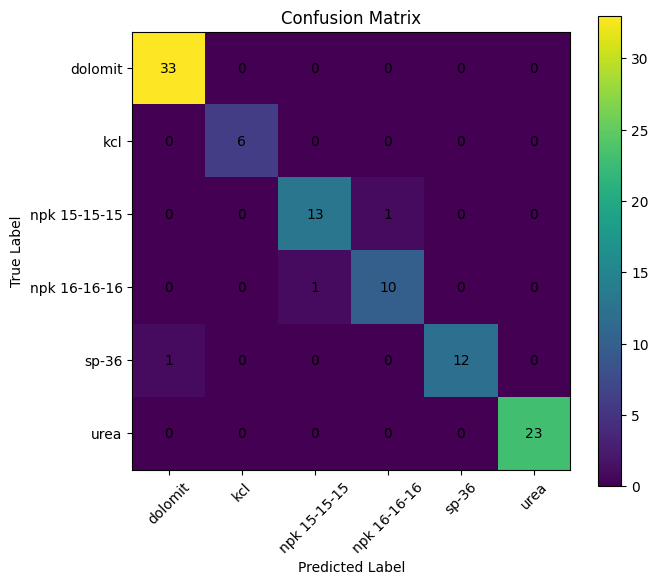

In [26]:
# Visual confusion matrix

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(7,6))
plt.imshow(cm, interpolation="nearest")
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center"
        )

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

**9. Simulasi Sistem Rekomendasi Pupuk**

In [27]:
# Ambil range dataset

range_ph = (df["ph_tanah"].min(), df["ph_tanah"].max())
range_usia = (df["usia_tanaman_bulan"].min(), df["usia_tanaman_bulan"].max())


In [28]:
# Input pilihan

def input_pilihan(pesan, pilihan):
    while True:
        nilai = input(pesan).strip().lower()
        if nilai in pilihan:
            return nilai
        print(f"Input harus salah satu dari: {pilihan}")

In [29]:
# Input angka tanpa range

def input_angka_bebas(pesan):
    while True:
        try:
            return float(input(pesan))
        except ValueError:
            print("Input harus berupa angka")

In [30]:
# Input angka dengan range

def input_angka_range(pesan, min_val, max_val):
    while True:
        try:
            nilai = float(input(pesan))
            if min_val <= nilai <= max_val:
                return nilai
            print(f"Input harus antara {min_val} dan {max_val}")
        except ValueError:
            print("Input harus berupa angka")

In [31]:
# Main function

def rekomendasi_pupuk_validasi(model, label_encoder, X_train):
    print("=== SISTEM REKOMENDASI PUPUK ===\n")

    jenis_tanaman = input_pilihan(
        "Masukkan jenis tanaman (padi / jagung): ",
        ["padi", "jagung"]
    )

    jenis_tanah = input_pilihan(
        "Masukkan jenis tanah (lempung / liat / berpasir): ",
        ["lempung", "liat", "berpasir"]
    )

    usia = input_angka_range(
        "Masukkan usia tanaman (bulan) [0 – 24]: ",
        0,
        24
    )

    ph = input_angka_range(
        "Masukkan pH tanah [4.5 – 7.5]: ",
        4.5,
        7.5
    )

    curah_hujan = input_angka_bebas(
        "Masukkan curah hujan (mm/tahun): "
    )

    n_tanah = input_angka_bebas(
        "Masukkan Nitrogen tanah (N): "
    )

    p_tanah = input_angka_bebas(
        "Masukkan Fosfor tanah (P): "
    )

    k_tanah = input_angka_bebas(
        "Masukkan Kalium tanah (K): "
    )

    input_user = pd.DataFrame([{
        "jenis_tanaman": jenis_tanaman,
        "usia_tanaman_bulan": usia,
        "jenis_tanah": jenis_tanah,
        "ph_tanah": ph,
        "curah_hujan_mm": curah_hujan,
        "n_tanah": n_tanah,
        "p_tanah": p_tanah,
        "k_tanah": k_tanah
    }])

    input_encoded = pd.get_dummies(
        input_user,
        columns=["jenis_tanaman", "jenis_tanah"],
        dtype=int
    )

    input_encoded = input_encoded.reindex(
        columns=X_train.columns,
        fill_value=0
    )

    prediksi = model.predict(input_encoded)
    hasil = label_encoder.inverse_transform(prediksi)

    print("\n=== HASIL REKOMENDASI ===")
    print(f"👉 Rekomendasi pupuk: {hasil[0]}")

In [33]:
# Run sistem

rekomendasi_pupuk_validasi(
    model=model,
    label_encoder=label_encoder,
    X_train=X_train
)

=== SISTEM REKOMENDASI PUPUK ===

Masukkan jenis tanaman (padi / jagung): padi
Masukkan jenis tanah (lempung / liat / berpasir): 8.5
Input harus salah satu dari: ['lempung', 'liat', 'berpasir']
Masukkan jenis tanah (lempung / liat / berpasir): berpasir
Masukkan usia tanaman (bulan) [0 – 24]: 8.5
Masukkan pH tanah [4.5 – 7.5]: 6.66
Masukkan curah hujan (mm/tahun): 1580
Masukkan Nitrogen tanah (N): 0.134
Masukkan Fosfor tanah (P): 39.3
Masukkan Kalium tanah (K): 224.2

=== HASIL REKOMENDASI ===
👉 Rekomendasi pupuk: urea


**Export File Model dan Encoder**

In [34]:
import joblib

joblib.dump(model, "model_pupuk.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")
joblib.dump(X_train.columns, "model_columns.pkl")

['model_columns.pkl']